In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Load and ckeck data

In [ ]:
df = pd.read_csv('data.csv', index_col=0)
print(df.shape)
df.tail(2)

(1356, 16)


,Departamento,produto,preco_inteiro,preco_decimal,prazo,frete,qtd_reviews,rating,tag,url_produto,preco,rating_ajustado,frete_gratis,prazo_ajustado,frete_preco,frete_gratis_binario
366,Celulares e Comunicação,Carregador Rápido Samsung sem Fio Pad II 2019 ...,"189,",0.0,NaN,"Receba atéSábado, 29 de maiOpção de frete GRÁT...",131.0,"4,6 de 5 estrelas",[],/Carregador-R%C3%A1pido-Samsung-Preto-Original...,189.0,4.8,frete grátis,7.0,0.00,1
367,Celulares e Comunicação,"Smartwatch Amazfit GTS 2, Relógio Inteligente,...","1.149,",90.0,NaN,"R$ 31,92 de frete",861.0,"4,0 de 5 estrelas",[],/Smartwatch-Amazfit-Inteligente-telef%C3%B4nic...,1149.0,4.7,NaN,NaN,31.92,0


In [ ]:
df['id'] = 0
for i in range(df.shape[0]):
    df.iloc[i,-1] = i
df.set_index('id', drop=True, append=False, inplace=True, verify_integrity=True)
df.tail(2)

,Departamento,produto,preco_inteiro,preco_decimal,prazo,frete,qtd_reviews,rating,tag,url_produto,preco,rating_ajustado,frete_gratis,prazo_ajustado,frete_preco,frete_gratis_binario
id,,,,,,,,,,,,,,,,
1354,Celulares e Comunicação,Carregador Rápido Samsung sem Fio Pad II 2019 ...,"189,",0.0,NaN,"Receba atéSábado, 29 de maiOpção de frete GRÁT...",131.0,"4,6 de 5 estrelas",[],/Carregador-R%C3%A1pido-Samsung-Preto-Original...,189.0,4.8,frete grátis,7.0,0.00,1
1355,Celulares e Comunicação,"Smartwatch Amazfit GTS 2, Relógio Inteligente,...","1.149,",90.0,NaN,"R$ 31,92 de frete",861.0,"4,0 de 5 estrelas",[],/Smartwatch-Amazfit-Inteligente-telef%C3%B4nic...,1149.0,4.7,NaN,NaN,31.92,0


In [ ]:
#############################
#############################
text = 'produto'
#############################
#############################

In [ ]:
data = pd.DataFrame(df[text].copy(deep=True))
print(data.shape)
data.head()

(1356, 1)


,produto
id,
0,Notebook Lenovo Ultrafino ideapad S145 i5-1035...
1,Impressora multifuncional HP DeskJet Ink Advan...
2,Multifuncional Epson EcoTank L3150 - Tanque de...
3,"Suporte para Notebook, OCTOO, Uptable, UP-BL, ..."
4,"Apple iPad 8ª Geração 10.2"", Wi-Fi, 128GB Spac..."


In [ ]:
data.isnull().sum()

produto    140
dtype: int64

In [ ]:
data.dropna(inplace=True)
print(data.shape)

(1216, 1)


In [ ]:
######### LOADS DATASET WITH TRANSLATED (PT x EN) DESCRIPTION ##########

data_en = pd.read_csv('Google_Trans_TranslatedVers.csv', sep=';', index_col=0)
print(data_en.shape)
data_en.head(2)

(1216, 3)


,Product Description,ModelTranslate,HandTranslate
id,,,
0,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,Noteovo Lenovo Ultrafino Idention C145 I5-1035...,Lenovo Ultra Slim notebook ideapad S145 i5-103...
1,Impressora multifuncional HP DeskJet Ink Advan...,HP Deskjet Ink Advantage 2774 Multifunction Pr...,HP DeskJet Ink Advantage 2774 All-in-One Print...


In [ ]:
data_final = pd.merge(data, data_en['HandTranslate'], left_index=True, right_index=True)
#data_final.drop(['produto_y'], axis=1, inplace=True)
#data_final.columns = ['produto', 'produto_en', 'language']
print(data_final.shape)
data_final.head(2)

(1216, 2)


,produto,HandTranslate
id,,
0,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,Lenovo Ultra Slim notebook ideapad S145 i5-103...
1,Impressora multifuncional HP DeskJet Ink Advan...,HP DeskJet Ink Advantage 2774 All-in-One Print...


In [ ]:
data_final['language'].value_counts(normalize=True)

pt    0.734375
en    0.234375
es    0.009868
gl    0.004934
ca    0.003289
bg    0.003289
it    0.002467
gu    0.001645
da    0.000822
ht    0.000822
sv    0.000822
la    0.000822
eo    0.000822
tl    0.000822
co    0.000822
Name: language, dtype: float64

<AxesSubplot:xlabel='language', ylabel='count'>

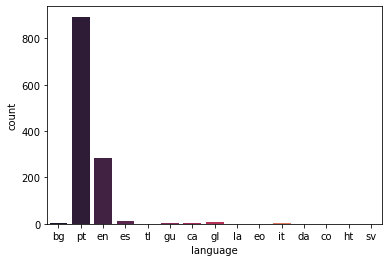

In [ ]:
sns.countplot(x='language', data=data_final, palette='rocket')

## Text preprocessing and Lemmatization

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_en = stopwords.words("english")
stopwords_pt = stopwords.words("portuguese")
print(len(stopwords_en))
print(len(stopwords_pt))

179
204


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chafu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string
stopwords_en += list(string.punctuation)
stopwords_pt += list(string.punctuation)
stopwords_en += [".", "''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©', '-', '–', '—', '_',"/", "?", "!", ";", ",", 'ii', 'iii']
stopwords_pt += [".", "''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©', '-', '–', '—', '_',"/", "?", "!", ";", ",", 'ii', 'iii']
#stopwords_pt = set(stopwords_pt)
print(len(stopwords_en))
print(len(stopwords_pt))

235
260


In [ ]:
englishST = pd.read_csv('englishST.txt')
englishST = englishST.values
portugueseST = pd.read_csv('portugueseST.txt')
portugueseST = portugueseST.values
print(len(stopwords_en))
print(len(stopwords_pt))

235
260


In [ ]:
for w in englishST:
    stopwords_en.append(w[0])
print(len(stopwords_en))

for w in portugueseST:
    stopwords_pt.append(w[0])
print(len(stopwords_pt))

805
615


In [ ]:
stopwords_en = dict.fromkeys(stopwords_en)
stopwords_en = list(stopwords_en.keys())
print(len(stopwords_en))

stopwords_pt = dict.fromkeys(stopwords_pt)
stopwords_pt = list(stopwords_pt.keys())
print(len(stopwords_pt))

644
499


In [ ]:
import spacy
#spacy.cli.download('en_core_web_lg')

In [ ]:
spacy.cli.download('pt_core_news_lg')

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_lg')


In [ ]:
spacy_en = spacy.load('en_core_web_lg')
#spacy_pt = spacy.load('pt_core_news_lg')

In [ ]:
import unicodedata
def remover_acento(texto):
    try:
        texto = unicode(texto, 'utf-8')
    except NameError:
        pass
    texto = unicodedata.normalize('NFD', texto)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(texto)

In [ ]:
import re
def remover_stopwords(texto, stopwords):
    palavras = re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())
    sem_stopwords = [p for p in palavras if p not in stopwords]
    return ' '.join(sem_stopwords)

In [ ]:
def lemmatiza_en(texto):
    texto = remover_stopwords(remover_acento(texto), stopwords_en)
    nlp_texto = spacy_en(texto)
    lem = [word.lemma_ for word in nlp_texto] # if word.lemma_ == "VERB" else word.lower_ 
    return ' '.join(lem)

In [ ]:
def lemmatiza_pt(texto):
    texto = remover_stopwords(remover_acento(texto), stopwords_pt)
    nlp_texto = spacy_pt(texto)
    lem = [word.lemma_ for word in nlp_texto] # if word.lemma_ == "VERB" else word.lower_ 
    return ' '.join(lem)

In [ ]:
text = 'HandTranslate'
s = time.time()
data_final['text_lem_en'] = data_final[text].astype(str).apply(lemmatiza_en)
e = time.time()
print(e-s)

6.458982229232788


In [ ]:
s = time.time()
data_final['text_lem_pt'] = data_final[text].astype(str).apply(lemmatiza_pt)
e = time.time()
print(e-s)

16.365604877471924


In [ ]:
text = 'produto_en'
s = time.time()
data_final['text_en_lem_en'] = data_final[text].astype(str).apply(lemmatiza_en)
e = time.time()
print(e-s)

17.56429934501648


In [ ]:
data_final

,produto,HandTranslate,text_lem_en
id,,,
0,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,Lenovo Ultra Slim notebook ideapad S145 i5-103...,lenovo ultra slim notebook ideapad windows dol...
1,Impressora multifuncional HP DeskJet Ink Advan...,HP DeskJet Ink Advantage 2774 All-in-One Print...,hp deskjet ink advantage printer wi fi
2,Multifuncional Epson EcoTank L3150 - Tanque de...,Epson EcoTank L3150 All-in-One - Color Ink Tan...,epson ecotank color ink tank wi fi direct usb ...
3,"Suporte para Notebook, OCTOO, Uptable, UP-BL, ...",Notebook Stand; OCTOO; Uptable; UP-BL; Black,notebook stand octoo uptable bl black
4,"Apple iPad 8ª Geração 10.2"", Wi-Fi, 128GB Spac...","Apple iPad 8th Generation 10.2""; Wi-Fi; 128GB ...",apple ipad generation wi fi space gray
...,...,...,...
1351,Carregador Usb-c 18w Fast Charger Apple (Branco),18w Fast Charger Apple Usb-c Charger (White),fast charger apple usb charger white
1352,"Smartphone Samsung Galaxy A21s 32GB Tela 6.5"" ...",Smartphone Samsung Galaxy A21s 32GB Screen 6.5...,smartphone samsung galaxy screen camera global...
1353,Celular Apple iPhone 11 Pro 64gb / Tela 5.8'' ...,Apple iPhone 11 Pro 64gb / Screen 5.8'' / 12MP...,apple iphone pro screen ios


In [ ]:
data_final.to_csv('produtos_amazon_descricao_lemmatizada_en_en.csv')

## Word Embedding (Word Vector)
https://jalammar.github.io/illustrated-word2vec/

In [ ]:
st = time.time()
#

with spacy_en.disable_pipes():
    #doc_vectors = np.array([nlp_pt(text).vector for text in reviews.review_lem])
    #vec_pt_en = [spacy_en(text).vector for text in data_final.text_lem_en]
    #vec_pt_pt = [spacy_pt(text).vector for text in data_final.text_lem_pt]
    vec_en_en = [spacy_en(text).vector for text in data_final.text_lem_en]
#
ed = time.time()
print(ed-st)

6.090639591217041


In [ ]:
#print(np.shape(vec_pt_en))
#print(np.shape(vec_pt_pt))
print(np.shape(vec_en_en))

(1216, 300)


In [ ]:
#data_final['vec_pt_en'] = vec_pt_en
#data_final['vec_pt_pt'] = vec_pt_pt
data_final['vec_en_en'] = vec_en_en
data_final.head()

,produto,HandTranslate,text_lem_en,vec_en_en
id,,,,
0,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,Lenovo Ultra Slim notebook ideapad S145 i5-103...,lenovo ultra slim notebook ideapad windows dol...,"[-0.040196627, 0.037964586, 0.12528834, 0.1376..."
1,Impressora multifuncional HP DeskJet Ink Advan...,HP DeskJet Ink Advantage 2774 All-in-One Print...,hp deskjet ink advantage printer wi fi,"[-0.16277957, 0.3082428, 0.20211728, -0.341405..."
2,Multifuncional Epson EcoTank L3150 - Tanque de...,Epson EcoTank L3150 All-in-One - Color Ink Tan...,epson ecotank color ink tank wi fi direct usb ...,"[-0.0749131, 0.18274601, -0.023975002, -0.1869..."
3,"Suporte para Notebook, OCTOO, Uptable, UP-BL, ...",Notebook Stand; OCTOO; Uptable; UP-BL; Black,notebook stand octoo uptable bl black,"[-0.15552501, -0.015179333, 0.10225833, 0.0317..."
4,"Apple iPad 8ª Geração 10.2"", Wi-Fi, 128GB Spac...","Apple iPad 8th Generation 10.2""; Wi-Fi; 128GB ...",apple ipad generation wi fi space gray,"[0.059818573, 0.11286, 0.04684043, -0.17929544..."


In [ ]:
data_final.to_csv('produtos_amazon_descricao_lemmatizada_wordvec_en_en.csv')